In [1]:
%pip install pandas numpy
import pandas as pd
import numpy as np

# Визуализация
import matplotlib.colors as colors
from matplotlib import colors
from matplotlib import cm
%pip install scipy seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Valentin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Valentin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Чтение файл
pl=pd.read_csv('Google-Playstore.csv')

## Делаем копию DataFrame и основные преобразования

In [4]:
# Создаем копию DataFrame 
pl_c=pl.copy(deep=True)
# Удаляем атрибуты не влияющие на анализ
pl_store=pl_c.drop(columns=["Developer Id", "Developer Website","Developer Email","Privacy Policy", "Content Rating", "Editors Choice", "Size"])
# Корректируем название столбцов
new_columns={"App Name":'App_name', "Rating Count":'Rating_count',"Minimum Installs":'Minimum_installs', "Maximum Installs":'Maximum_installs',
             "Last Updated": 'Last_updated', "Ad Supported": 'Ad_supported', "In App Purchases":'In_app_purchases', "App Id":'App_id'}
pl_store=pl_store.rename(columns=new_columns, inplace=False)
# Переименовываем содержимое стобца 'Free' и изменяем тип-данных
pl_store['Free']=pl_store['Free'].astype(str)
pl_store['Free']=pl_store['Free'].replace({'True':'Free', 'False':'Paid'})

pl_store['Ad_supported']=pl_store['Ad_supported'].astype(str)
pl_store['In_app_purchases']=pl_store['In_app_purchases'].astype(str)

# Приводим к формату Date и в столбце Released and Last_updated оставляем только год
pl_store['Released']=pd.to_datetime(pl_store['Released'])
pl_store['Released']=pl_store['Released'].dt.year
pl_store['Last_updated']=pd.to_datetime(pl_store['Last_updated'])
pl_store['Last_updated']=pl_store['Last_updated'].dt.year

# Заменяем пропуски в столбце Released на значения из столбца Last_update
pl_store['Released'].fillna(value=pl_store['Last_updated'], inplace=True)
pl_store['Released']=pl_store['Released'].astype('int32')

C:\Users\Valentin\AppData\Local\Temp\ipykernel_9432\111435355.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pl_store['Released'].fillna(value=pl_store['Last_updated'], inplace=True)


## Создаем базу для подлюченич к SQL

In [6]:
###### SQL
%pip install sqlite3
import sqlite3

# Создаем базу данных: play_store
connection = sqlite3.connect('play_store.db')
# Создаем переменную 'с' для запроса к базе данных
c = connection.cursor()
# перевод DataFrame в таблицу для SQL с помощью функции to_sql
pl_store.to_sql('play_store', connection, if_exists='replace', index=False)

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Valentin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


2312944

In [9]:
pl_store.head(5)

,App_name,App_id,Category,Rating,Rating_count,Installs,Minimum_installs,Maximum_installs,Free,Price,Currency,Minimum Android,Released,Last_updated,Ad_supported,In_app_purchases,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,Free,0.0,USD,7.1 and up,2020,2020,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+","5,000.0",7662,Free,0.0,USD,5.0 and up,2020,2021,True,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,Free,0.0,USD,4.0.3 and up,2019,2019,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,Free,0.0,USD,4.0.3 and up,2018,2018,True,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,Free,0.0,USD,4.1 and up,2020,2018,False,False,2021-06-15 20:19:35


In [8]:
pd.options.display.float_format = '{:,.1f}'.format

In [10]:
rows=pl_store.shape[1]
columps=pl_store.shape[0]
print(f'Количество столбцов в DataFrame={rows},'f' '
      f'Количество строк в DataFrame={columps}')

Количество столбцов в DataFrame=17, Количество строк в DataFrame=2312944


In [11]:
pl_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App_name          object 
 1   App_id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating_count      float64
 5   Installs          object 
 6   Minimum_installs  float64
 7   Maximum_installs  int64  
 8   Free              object 
 9   Price             float64
 10  Currency          object 
 11  Minimum Android   object 
 12  Released          int32  
 13  Last_updated      int32  
 14  Ad_supported      object 
 15  In_app_purchases  object 
 16  Scraped Time      object 
dtypes: float64(4), int32(2), int64(1), object(10)
memory usage: 282.3+ MB


## Проверяем на наличие пропусков

In [13]:
pl_store.isna().sum()

App_name                5
App_id                  0
Category                0
Rating              22883
Rating_count        22883
Installs              107
Minimum_installs      107
Maximum_installs        0
Free                    0
Price                   0
Currency              135
Minimum Android      6530
Released                0
Last_updated            0
Ad_supported            0
In_app_purchases        0
Scraped Time            0
dtype: int64

In [14]:
(pl_store.isna().sum().sort_values(ascending=False)/len(pl_store)*100).apply(lambda x: f'{x:.1%}')

Rating              98.9%
Rating_count        98.9%
Minimum Android     28.2%
Currency             0.6%
Installs             0.5%
Minimum_installs     0.5%
App_name             0.0%
In_app_purchases     0.0%
Ad_supported         0.0%
Last_updated         0.0%
Released             0.0%
Free                 0.0%
Price                0.0%
App_id               0.0%
Maximum_installs     0.0%
Category             0.0%
Scraped Time         0.0%
dtype: object

## Проверяем на наличие дубликатов

In [16]:
pl_store['App_name'].duplicated().any()


np.True_

In [15]:
wer=pl_store['App_name'].value_counts().reset_index()
wer.head()

,App_name,count
0,Tic Tac Toe,382
1,Calculator,261
2,Flashlight,256
3,BMI Calculator,201
4,Age Calculator,190


In [17]:
# У названий есть дубликаты, но App_id у всех разный
sort=pl_store[pl_store['App_name']=='BMI Calculator']
sort.head(4)

,App_name,App_id,Category,Rating,Rating_count,Installs,Minimum_installs,Maximum_installs,Free,Price,Currency,Minimum Android,Released,Last_updated,Ad_supported,In_app_purchases,Scraped Time
8545,BMI Calculator,es.trellat.imc,Health & Fitness,4.5,10.0,"5,000+","5,000.0",8096,Free,0.0,USD,4.2 and up,2017,2018,True,False,2021-06-15 20:27:58
9684,BMI Calculator,com.fitneske.bmicalculator,Productivity,0.0,0.0,1+,1.0,3,Free,0.0,USD,4.1 and up,2020,2020,False,False,2021-06-15 20:29:02
11972,BMI Calculator,com.gamosoftstudio.bmicalculator,Health & Fitness,0.0,0.0,10+,10.0,21,Free,0.0,USD,5.0 and up,2020,2020,True,False,2021-06-15 20:31:16
15105,BMI Calculator,com.mohitatray.bmicalculator,Health & Fitness,4.6,35.0,"1,000+","1,000.0",3324,Free,0.0,USD,4.0 and up,2017,2018,True,False,2021-06-15 20:34:16


## Раздел 1. Категории

In [19]:
pl_store['Category'].value_counts().reset_index().head(5)

,Category,count
0,Education,241090
1,Music & Audio,154906
2,Tools,143988
3,Business,143771
4,Entertainment,138276


In [14]:
pl_store['Released'].value_counts()


Released
2020    565821
2019    493797
2018    341376
2017    263757
2021    203729
2016    168597
2015    116096
2014     72175
2013     42699
2012     25811
2011     14394
2010      4681
2009        11
Name: count, dtype: int64

In [20]:
pl_years=pl_store.groupby(['Released'])['App_name'].count().sort_values(ascending=True).reset_index()
pl_years.head(10)

,Released,App_name
0,2009,11
1,2010,4681
2,2011,14393
3,2012,25811
4,2013,42699
5,2014,72174
6,2015,116096
7,2016,168597
8,2021,203728
9,2017,263757


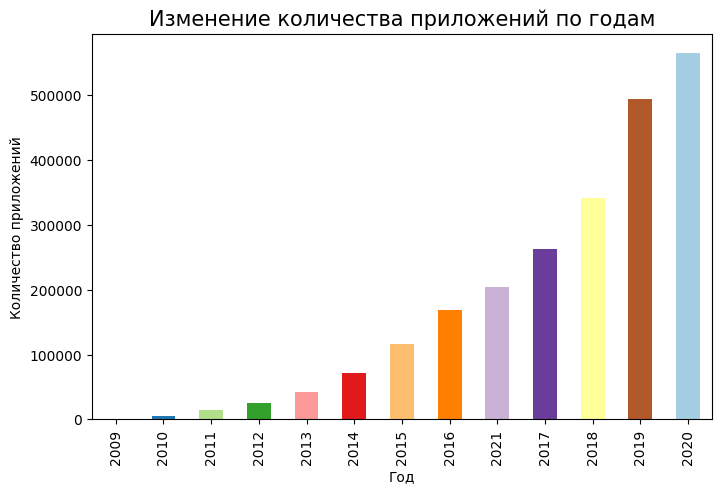

In [21]:
colors = sns.color_palette("Paired").as_hex()[:len(pl_years)]

pl_years.plot( x='Released', y='App_name', kind='bar',figsize=(8, 5), color=colors, legend=False)
plt.title('Изменение количества приложений по годам', size=15)
plt.xlabel('Год')
plt.ylabel('Количество приложений')
plt.show()

In [22]:
# Находим топ-20 категорий по количеству приложений в каждой категории
cat=pl_store.groupby(['Category'])['App_name'].count().sort_values(ascending=False).reset_index()
cat.head(10)

,Category,App_name
0,Education,241090
1,Music & Audio,154906
2,Tools,143988
3,Business,143771
4,Entertainment,138274
5,Lifestyle,118331
6,Books & Reference,116728
7,Personalization,89210
8,Health & Fitness,83510
9,Productivity,79698


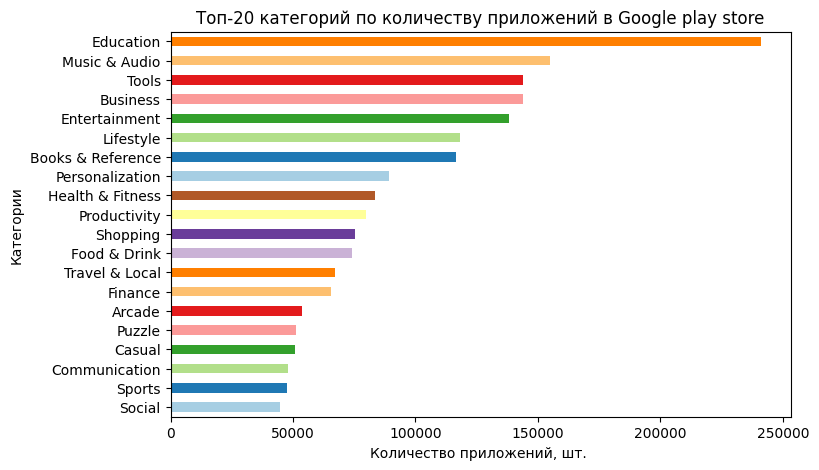

In [38]:
colors = sns.color_palette("Paired").as_hex()[:len(cat)]

cat.head(20).sort_index(ascending=False).plot( x='Category', y='App_name', kind='barh',figsize=(8, 5), color=colors, legend=False)
plt.title('Топ-20 категорий по количеству приложений в Google play store', size=12)
plt.xlabel('Количество приложений, шт. ')
plt.ylabel('Категории')
plt.show()

## Определяем Топ-20 категорий по популярности (популярность определяется, как макиммально количество скачиваний в этой категории)

In [24]:
pl_store_1=pl_store.groupby(['Category'])['Maximum_installs'].sum().sort_values(ascending=False).reset_index()
pl_store_1['Max_installs_млн_раз']=pl_store_1['Maximum_installs']//1000000
pl_store_1.head(10)

,Category,Maximum_installs,Max_installs_млн_раз
0,Tools,119849500546,119849
1,Communication,72306404399,72306
2,Productivity,45368330480,45368
3,Entertainment,32544902249,32544
4,Social,32216881194,32216
5,Photography,31590959146,31590
6,Video Players & Editors,31439400808,31439
7,Action,30742136749,30742
8,Casual,30525269577,30525
9,Arcade,25681896317,25681


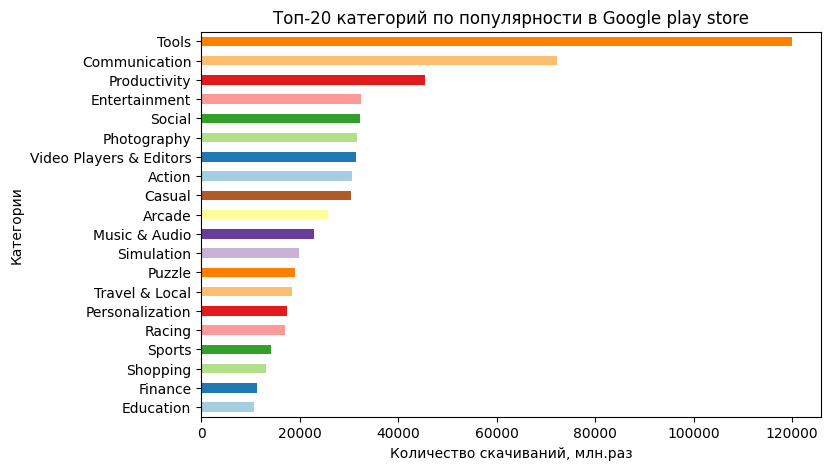

In [39]:
colors = sns.color_palette("Paired").as_hex()[:len(pl_store_1)]
pl_store_1.head(20).sort_index(ascending=False).plot(x='Category', y='Max_installs_млн_раз', kind='barh',figsize=(8, 5),color=colors, legend=False)

plt.title('Топ-20 категорий по популярности в Google play store', size=12)
plt.xlabel('Количество скачиваний, млн.раз')
plt.ylabel('Категории')
plt.show()

## Рассмотрим изменение популярности категорий по годам с 2016 по 2021 г.

In [26]:
pl_store_2=pl_store.groupby(['Category','Released'])['Maximum_installs'].sum().reset_index().sort_values(by=['Maximum_installs'], ascending=[False])
pl_store_2.head(10)

,Category,Released,Maximum_installs
158,Communication,2010,21534667302
513,Tools,2013,21131706379
512,Tools,2012,15168072427
517,Tools,2017,12498277589
510,Tools,2010,11571902110
521,Tools,2021,11126276146
515,Tools,2015,10857703581
161,Communication,2013,10816093194
160,Communication,2012,10611269784
518,Tools,2018,9952622770


In [27]:
# Сделали группировку по количеству установок приложений в порядке убывания и по годам в порядке возрастания
pl_store_2=pl_store.groupby(['Category','Released'])['Maximum_installs'].sum().reset_index().sort_values(by=['Released','Maximum_installs'], ascending=[True,False])
# Год релиза установили, что начинается с 2016 года по 2021 г.
pl_store_2=pl_store_2.query('Released>=2016')
pl_store_2.head(5)


,Category,Released,Maximum_installs
516,Tools,2016,8948351471
164,Communication,2016,5121086075
6,Action,2016,4389325707
140,Casual,2016,3632928801
346,Music & Audio,2016,3124225684


In [36]:
# Сделали функцию, которая  выводит тот-8 категорий по количеству установок и ы опредленный год.
def top_categ_year(df, year, category, install_max, n=8):
    result = []
    for i, j in pl_store_2.groupby(year):
        top_n = j.nlargest(n, install_max)[[category, install_max, year]]
        result.append(top_n)
    return pd.concat(result)

tot_res=top_categ_year(pl_store_1,'Released','Category','Maximum_installs', n=8).reset_index()
tot_res['Maximum_installs, млн.уст.']=tot_res['Maximum_installs']//1000000
tot_res.head(10)

,index,Category,Maximum_installs,Released,"Maximum_installs, млн.уст."
0,516,Tools,8948351471,2016,8948
1,164,Communication,5121086075,2016,5121
2,6,Action,4389325707,2016,4389
3,140,Casual,3632928801,2016,3632
4,346,Music & Audio,3124225684,2016,3124
5,431,Racing,2919318254,2016,2919
6,467,Simulation,2719247786,2016,2719
7,213,Entertainment,2515292906,2016,2515
8,517,Tools,12498277589,2017,12498
9,395,Photography,5123737897,2017,5123


C:\Users\Valentin\AppData\Local\Temp\ipykernel_9432\1788955386.py:4: UserWarning: 
The palette list has fewer values (10) than needed (48) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(tot_res, x="Released", y="Maximum_installs, млн.уст.", hue="Category", hue_order=tot_res['Category'],palette=a, width=True)


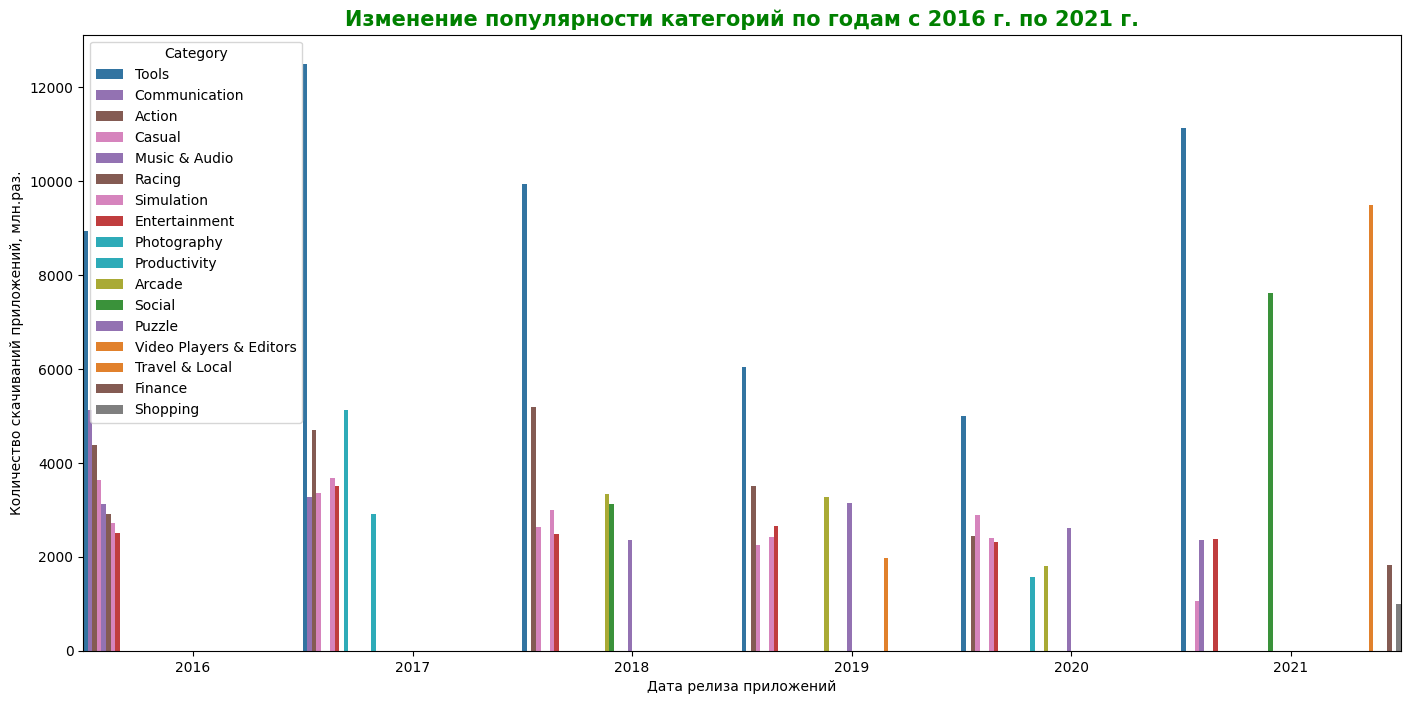

In [37]:
a=sns.color_palette()
rcParams['figure.figsize']= 17,8

sns.barplot(tot_res, x="Released", y="Maximum_installs, млн.уст.", hue="Category", hue_order=tot_res['Category'],palette=a, width=True)
plt.xlabel('Дата релиза приложений')
plt.ylabel('Количество скачиваний приложений, млн.раз.')
plt.title('Изменение популярности категорий по годам c 2016 г. по 2021 г.', size=15, color='g', weight='bold');

## Рассматриваем изменение количества, выпущенных приложений по годам с 2016 г. по 2021г. 

In [31]:
# Сделали группировку по количеству приложений в порядке убывния и по годвм в порядку возрастания
pl_store_3=pl_store.groupby(['Category','Released'])['App_name'].count().reset_index().sort_values(by=['Released','App_name'], ascending=[True,False])
pl_store_3=pl_store_3.query('Released>=2016')
pl_store_3.head(5)
# Сделали функцию, выводящая тот-5 приложений по количеству выпусков приложений и  по годам.
def top_categ_year(df, year, category, count_app, n=7):
    result = []
    for i, j in pl_store_3.groupby(year):
        top_n = j.nlargest(n, count_app)[[category, count_app, year]]
        result.append(top_n)
    return pd.concat(result)

tot_app=top_categ_year(pl_store_3,'Released','Category','App_name', n=7).reset_index()
#tot_res['Maximum_installs, млн.уст.']=tot_res['Maximum_installs']//1000000
tot_app.head(10)

,index,Category,App_name,Released
0,188,Education,17559,2016
1,299,Lifestyle,13243,2016
2,103,Business,10900,2016
3,91,Books & Reference,10655,2016
4,516,Tools,9853,2016
5,346,Music & Audio,8973,2016
6,213,Entertainment,8017,2016
7,189,Education,30413,2017
8,104,Business,17086,2017
9,300,Lifestyle,16487,2017


C:\Users\Valentin\AppData\Local\Temp\ipykernel_9432\2328831390.py:5: UserWarning: 
The palette list has fewer values (10) than needed (42) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(tot_app, x="Released", y="App_name", hue="Category", hue_order=tot_app['Category'],palette=a, width=True)


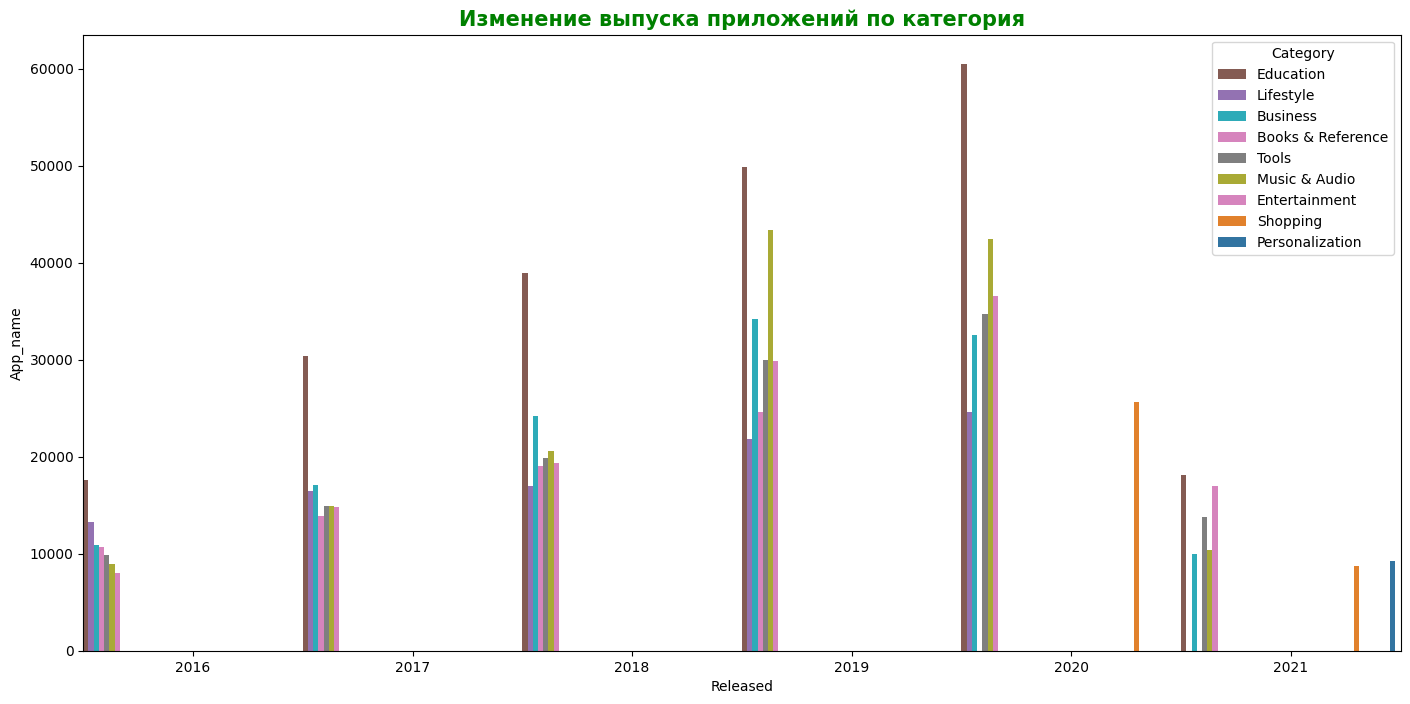

In [32]:
#colors_list = list(colors._colors_full_map.values())
a=sns.color_palette()
rcParams['figure.figsize']= 17,8

sns.barplot(tot_app, x="Released", y="App_name", hue="Category", hue_order=tot_app['Category'],palette=a, width=True)
plt.title('Изменение выпуска приложений по категория', size=15, color='g', weight='bold');

## Топ-10 самых популярных ПРИЛОЖЕНИЙ по категориям

In [140]:
query='select App_name, Category,Rating, max(Maximum_installs) as Max_installs from play_store group by Category order by Max_installs desc;'
result= c.execute(query).fetchall()
result
columns = [column[0] for column in c.description]
columns


['App_name', 'Category', 'Rating', 'Max_installs']

In [141]:
table_1=pd.DataFrame(result, columns=columns)
table_1=table_1.sort_values(by='Max_installs',ascending=False).nlargest(20,'Max_installs').reset_index()
table_1['Max_installs_млн_раз']=table_1['Max_installs']//1000000
table_1.head(5)


,index,App_name,Category,Rating,Max_installs,Max_installs_млн_раз
0,0,Google Play services,Tools,4.2,12057627016,12057
1,1,YouTube,Video Players & Editors,4.4,9766230924,9766
2,2,Google Maps - Navigate & Explore,Travel & Local,3.8,9141671889,9141
3,3,Google Chrome: Fast & Secure,Communication,4.1,8925640788,8925
4,4,Google Drive,Productivity,4.3,7028265259,7028


C:\Users\Valentin\AppData\Local\Temp\ipykernel_9432\559400632.py:5: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(table_1, x="Max_installs_млн_раз", y='App_name', hue='Category',palette=a)


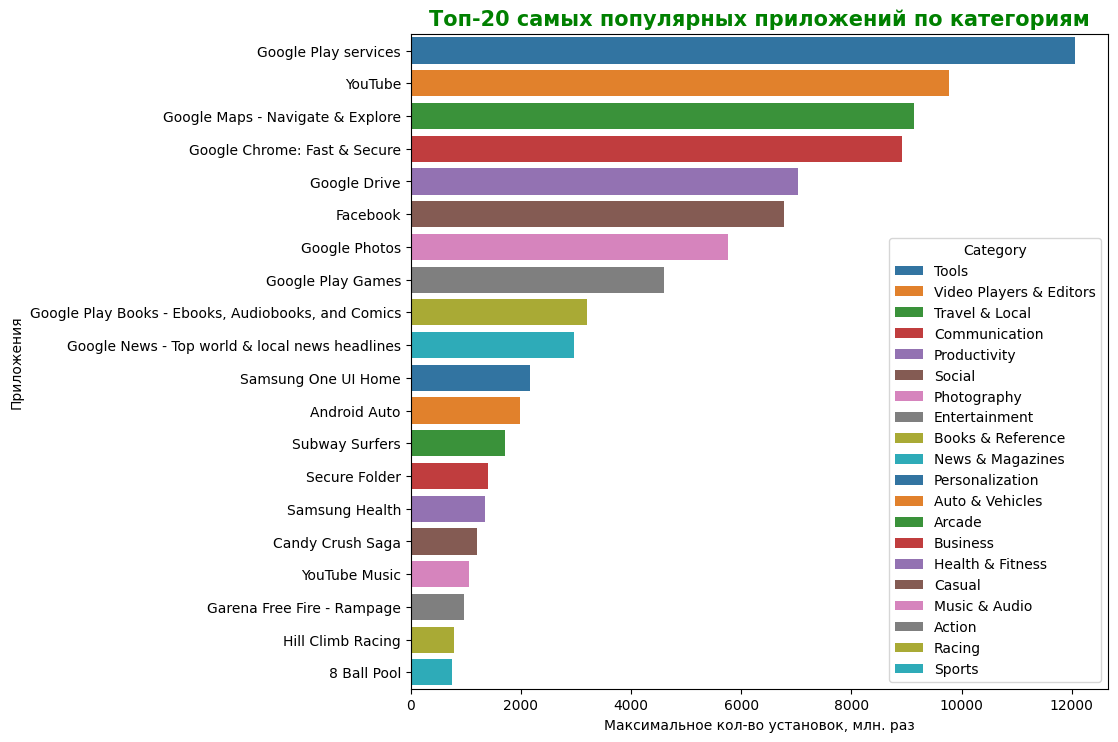

In [142]:
a=sns.color_palette()
rcParams['figure.figsize']= 9,8.5


sns.barplot(table_1, x="Max_installs_млн_раз", y='App_name', hue='Category',palette=a)
plt.title('Топ-20 самых популярных приложений по категориям', size=15, color='g', weight='bold')
plt.xticks(rotation=0);
plt.yticks(rotation=0);
plt.xlabel('Максимальное кол-во установок, млн. раз');
plt.ylabel('Приложения');

## Выводим категории по кол-ву платных и бесплатных приложений в абсолютном и относительном значении

In [145]:
query_2='''with  tot_name AS (Select Category, Free , count(App_Name)  AS quantity_app from play_store group by Category,Free), top_a AS 
(SELECT *, (sum(quantity_app) OVER (PARTITION BY Category)) AS total_quant FROM tot_name) 
SELECT *, (CAST (quantity_app AS float)/CAST(total_quant AS float)) AS rate FROM top_a GROUP BY Category, FREE ORDER BY total_quant desc;
'''

result_2= c.execute(query_2).fetchall()
result_2

columns = [column[0] for column in c.description]
columns

['Category', 'Free', 'quantity_app', 'total_quant', 'rate']

In [147]:
table_2=pd.DataFrame(result_2, columns=columns)
table_2['rate']=table_2['rate'].apply(lambda x: f'{x:.1%}')
table_2.head(10)
total_str=table_2.reset_index()
tot=total_str.query('index<=19')
tot.head(5)

,index,Category,Free,quantity_app,total_quant,rate
0,0,Education,Free,234541,241090,97.3%
1,1,Education,Paid,6549,241090,2.7%
2,2,Music & Audio,Free,153381,154906,99.0%
3,3,Music & Audio,Paid,1525,154906,1.0%
4,4,Tools,Free,139907,143988,97.2%


In [148]:
# prod=total_tab.loc[((total_tab['Category']=='Сокосодержащие напитки, смузи')|(total_tab['Category']=='Печенье'))].reset_index()#

tot_free_1=tot.loc[tot['Free']=="Free"].sort_values(by='rate',ascending=False).reset_index()
tot_free_1

,level_0,index,Category,Free,quantity_app,total_quant,rate
0,6,6,Business,Free,143098,143771,99.5%
1,2,2,Music & Audio,Free,153381,154906,99.0%
2,8,8,Entertainment,Free,136890,138274,99.0%
3,10,10,Lifestyle,Free,116987,118331,98.9%
4,16,16,Health & Fitness,Free,82095,83510,98.3%
5,18,18,Productivity,Free,77966,79698,97.8%
6,0,0,Education,Free,234541,241090,97.3%
7,4,4,Tools,Free,139907,143988,97.2%
8,12,12,Books & Reference,Free,113131,116728,96.9%
9,14,14,Personalization,Free,83442,89210,93.5%


In [149]:
tot_free_2=tot.loc[tot['Free']=="Paid"].sort_values(by='rate',ascending=False).reset_index()
tot_free_2

,level_0,index,Category,Free,quantity_app,total_quant,rate
0,15,15,Personalization,Paid,5768,89210,6.5%
1,13,13,Books & Reference,Paid,3597,116728,3.1%
2,5,5,Tools,Paid,4081,143988,2.8%
3,1,1,Education,Paid,6549,241090,2.7%
4,19,19,Productivity,Paid,1732,79698,2.2%
5,17,17,Health & Fitness,Paid,1415,83510,1.7%
6,11,11,Lifestyle,Paid,1344,118331,1.1%
7,3,3,Music & Audio,Paid,1525,154906,1.0%
8,9,9,Entertainment,Paid,1384,138274,1.0%
9,7,7,Business,Paid,673,143771,0.5%


C:\Users\Valentin\AppData\Local\Temp\ipykernel_9432\3332024525.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(tot, x="quantity_app", y="Category", hue="Free",palette=a)


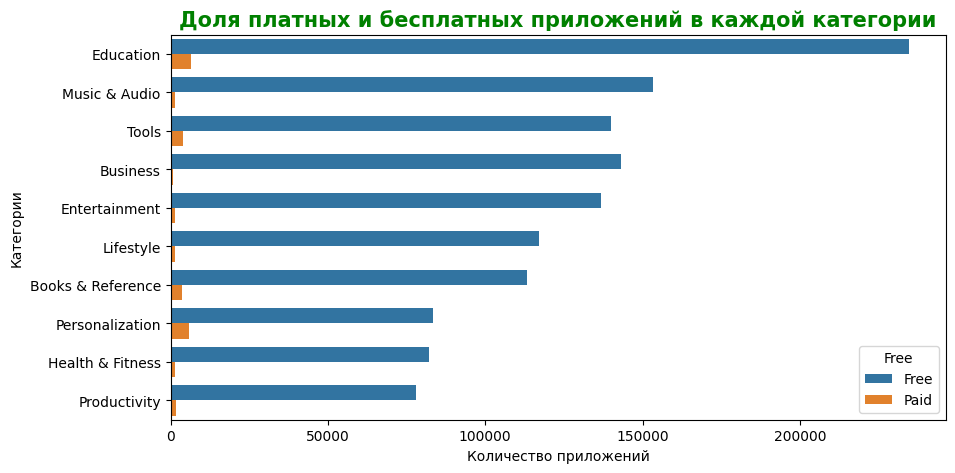

In [150]:
a=sns.color_palette()
rcParams['figure.figsize']= 10,5

sns.barplot(tot, x="quantity_app", y="Category", hue="Free",palette=a)
plt.title('Доля платных и бесплатных приложений в каждой категории', size=15, color='g', weight='bold');
plt.xticks(rotation=0);
plt.yticks(rotation=0);
plt.xlabel('Количество приложений');
plt.ylabel('Категории');

## Вывод: В каждой категории больше бесплатных приложений, чем платных

## Выводим категории по кол-во наличия или отсутствия рекламы в приложениях в абсолютном и относительном значении

In [64]:
query_3='''WITH advert AS (SELECT Category, Ad_supported, count(App_name) AS quantity_app FROM play_store GROUP BY Category, Ad_supported), 
qut AS (SELECT *, (sum(quantity_app) OVER (PARTITION BY category)) AS total_sum_app FROM advert ORDER BY total_sum_app DESC)
SELECT *, (CAST (quantity_app AS float)/CAST(total_sum_app AS float)) AS rate FROM qut GROUP BY Category, Ad_supported ORDER BY Category, rate desc;

'''
result_3= c.execute(query_3).fetchall()
result_3
columns_1 = [column[0] for column in c.description]
columns_1

['Category', 'Ad_supported', 'quantity_app', 'total_sum_app', 'rate']

In [65]:
table_3=pd.DataFrame(result_3, columns=columns_1)
table_3.head(10)

,Category,Ad_supported,quantity_app,total_sum_app,rate
0,Action,True,22334,27555,0.8
1,Action,False,5221,27555,0.2
2,Adventure,True,17995,23203,0.8
3,Adventure,False,5208,23203,0.2
4,Arcade,True,42305,53790,0.8
5,Arcade,False,11485,53790,0.2
6,Art & Design,True,13217,18539,0.7
7,Art & Design,False,5322,18539,0.3
8,Auto & Vehicles,False,13615,18280,0.7
9,Auto & Vehicles,True,4665,18280,0.3


## Какая доля приложений с рекламой по категориям (Топ-10 категорий)

In [66]:
table_3_true=table_3.query('Ad_supported=="True"').sort_values(by='rate', ascending=False).reset_index().nlargest(10,'rate')
table_3_true['Rate_false']=(1-table_3_true['rate'])
table_3_true['Rate_false']=table_3_true['Rate_false'].apply(lambda x: f'{x:.1%}')
table_3_true['rate']=table_3_true['rate'].apply(lambda x: f'{x:.1%}')
table_3_true.rename(columns={'rate':'Rate_true'}, inplace=True)
table_3_true

,index,Category,Ad_supported,quantity_app,total_sum_app,Rate_true,Rate_false
0,70,Racing,True,9183,10362,88.6%,11.4%
1,94,Word,True,7473,8630,86.6%,13.4%
2,76,Simulation,True,19918,23282,85.6%,14.4%
3,88,Trivia,True,10018,11795,84.9%,15.1%
4,54,Music,True,3485,4202,82.9%,17.1%
5,64,Photography,True,29378,35552,82.6%,17.4%
6,68,Puzzle,True,42271,51168,82.6%,17.4%
7,62,Personalization,True,73184,89210,82.0%,18.0%
8,0,Action,True,22334,27555,81.1%,18.9%
9,56,Music & Audio,True,124832,154906,80.6%,19.4%


## Какая доля приложений без рекламы по категориям (Топ-10 категорий)

In [63]:
table_3_false=table_3.query('Ad_supported=="False"').sort_values(by='rate', ascending=False).reset_index().nlargest(10,'rate')
table_3_false['Rate_true']=1-table_3_false['rate']
table_3_false['Rate_true']=table_3_false['Rate_true'].apply(lambda x: f'{x:.1%}')
table_3_false['rate']=table_3_false['rate'].apply(lambda x: f'{x:.1%}')
table_3_false.rename(columns={'rate':'Rate_false'}, inplace=True) # переименовываем
table_3_false

,index,Category,Ad_supported,quantity_app,total_sum_app,Rate_false,Rate_true
0,16,Business,False,129116,143771,89.8%,10.2%
1,74,Shopping,False,64435,75256,85.6%,14.4%
2,52,Medical,False,26453,32065,82.5%,17.5%
3,36,Events,False,10252,12841,79.8%,20.2%
4,40,Food & Drink,False,57463,73927,77.7%,22.3%
5,38,Finance,False,49398,65466,75.5%,24.5%
6,86,Travel & Local,False,50224,67288,74.6%,25.4%
7,66,Productivity,False,59400,79698,74.5%,25.5%
8,8,Auto & Vehicles,False,13615,18280,74.5%,25.5%
9,42,Health & Fitness,False,61447,83510,73.6%,26.4%


## Выводим категории по кол-во приложений,где есть покупки или нет в абсолютном и относительном значении

In [67]:
query_4='''WITH purch AS (SELECT Category, In_app_purchases, count(App_name) AS quantity_app_p FROM play_store GROUP BY Category,In_app_purchases), quant1 AS (
SELECT *, (sum(quantity_app_p) OVER (PARTITION BY Category)) AS total_sum_app_p FROM purch ORDER BY total_sum_app_p DESC)
SELECT *, (CAST (quantity_app_p AS float)/CAST(total_sum_app_p AS float)) AS rate_p FROM quant1 GROUP BY Category, In_app_purchases ORDER BY Category, rate_p asc;

'''
result_4= c.execute(query_4).fetchall()
result_4
columns_p= [column[0] for column in c.description]
columns_p

['Category', 'In_app_purchases', 'quantity_app_p', 'total_sum_app_p', 'rate_p']

In [68]:
table_4=pd.DataFrame(result_4, columns=columns_p)
table_4.head(4)

,Category,In_app_purchases,quantity_app_p,total_sum_app_p,rate_p
0,Action,True,7573,27555,0.3
1,Action,False,19982,27555,0.7
2,Adventure,True,4730,23203,0.2
3,Adventure,False,18473,23203,0.8


## Какая доля приложений с возможностью покупать внутри приложений по категориям (Топ-10 категорий)

In [69]:
table_4_true=table_4.query('In_app_purchases=="True"').sort_values(by='rate_p', ascending=False).reset_index().nlargest(10,'rate_p')
table_4_true['Rate_false']=(1-table_4_true['rate_p'])
table_4_true['Rate_false']=table_4_true['Rate_false'].apply(lambda x: f'{x:.1%}')
table_4_true['rate_p']=table_4_true['rate_p'].apply(lambda x: f'{x:.1%}')
table_4_true.rename(columns={'rate_p':'Rate_true'}, inplace=True)
table_4_true

,index,Category,In_app_purchases,quantity_app_p,total_sum_app_p,Rate_true,Rate_false
0,20,Casino,True,2526,5076,49.8%,50.2%
1,72,Role Playing,True,4686,10034,46.7%,53.3%
2,82,Strategy,True,3342,8526,39.2%,60.8%
3,94,Word,True,3150,8630,36.5%,63.5%
4,18,Card,True,2720,8179,33.3%,66.7%
5,76,Simulation,True,7265,23282,31.2%,68.8%
6,70,Racing,True,3026,10362,29.2%,70.8%
7,28,Dating,True,1904,6524,29.2%,70.8%
8,0,Action,True,7573,27555,27.5%,72.5%
9,68,Puzzle,True,12558,51168,24.5%,75.5%


## Какая доля приложений без возможности покупать внутри приложений по категориям (Топ-10 категорий)

In [70]:
table_4_false=table_4.query('In_app_purchases=="False"').sort_values(by='rate_p', ascending=False).reset_index().nlargest(10,'rate_p')
table_4_false['Rate_true']=1-table_4_false['rate_p']
table_4_false['Rate_true']=table_4_false['Rate_true'].apply(lambda x: f'{x:.1%}')
table_4_false['rate_p']=table_4_false['rate_p'].apply(lambda x: f'{x:.1%}')
table_4_false.rename(columns={'rate_p':'Rate_false'}, inplace=True) # переименовываем
table_4_false

,index,Category,In_app_purchases,quantity_app_p,total_sum_app_p,Rate_false,Rate_true
0,75,Shopping,False,74613,75256,99.1%,0.9%
1,37,Events,False,12684,12841,98.8%,1.2%
2,11,Beauty,False,11542,11772,98.0%,2.0%
3,17,Business,False,140746,143771,97.9%,2.1%
4,45,House & Home,False,13989,14369,97.4%,2.6%
5,41,Food & Drink,False,71815,73927,97.1%,2.9%
6,57,Music & Audio,False,150414,154906,97.1%,2.9%
7,39,Finance,False,62970,65466,96.2%,3.8%
8,27,Communication,False,46128,48167,95.8%,4.2%
9,7,Art & Design,False,17696,18539,95.5%,4.5%


## Раздел 2. Цены приложений

In [78]:
pl_store['Currency'].value_counts().reset_index()

,Currency,count
0,USD,2311548
1,XXX,1236
2,EUR,6
3,INR,5
4,GBP,3
5,CAD,2
6,VND,1
7,BRL,1
8,KRW,1
9,TRY,1


In [79]:
pl_store['Price'].value_counts().reset_index()

,Price,count
0,0.0,2268011
1,1.0,11851
2,2.0,5817
3,3.0,3921
4,1.5,3823
...,...,...
1058,8.2,1
1059,1.0,1
1060,13.5,1
1061,3.5,1


In [71]:
(pl_store['Price'].value_counts()/len(pl_store)).apply(lambda x: f'{x:.1%}')

Price
0.000000     98.1%
0.990000      0.5%
1.990000      0.3%
2.990000      0.2%
1.490000      0.2%
             ...  
8.205856      0.0%
1.030097      0.0%
13.530000     0.0%
3.550000      0.0%
18.903596     0.0%
Name: count, Length: 1063, dtype: object

In [80]:
# Убираем цены с 0 и сортируем категории по наличию наибольшего кол-ва цен в каждой категории
pl_store_with_0=pl_store.query("Price!=0") # убрали нули из DataFrame
# Оставляем только долларовую валюту
pl_with_0_dol=pl_store_with_0.query('Currency=="USD"')
pl_with_0_dol.head(10)

,App_name,App_id,Category,Rating,Rating_count,Installs,Minimum_installs,Maximum_installs,Free,Price,Currency,Minimum Android,Released,Last_updated,Ad_supported,In_app_purchases,Scraped Time
273,Limitless Paint,com.bytescaffold.limitlesspaint,Tools,4.5,236.0,"10,000+","10,000.0",34125,Paid,2.0,USD,4.1 and up,2018,2019,False,False,2021-06-15 20:19:52
296,Standalone Golf GPS by Hole19,com.hole19golf.wear,Sports,2.8,160.0,"10,000+","10,000.0",10407,Paid,5.0,USD,7.1 and up,2017,2020,False,False,2021-06-15 20:19:53
417,Calculator + Widget 21 themes,makatea.pro.calculator.widget,Tools,3.5,468.0,"10,000+","10,000.0",12019,Paid,1.0,USD,2.2 and up,2012,2014,False,False,2021-06-15 20:20:00
554,莎士比亞11連環錯（英漢對照）,tw.com.mebook.generic4719180217042,Education,0.0,0.0,1+,1.0,2,Paid,3.0,USD,4.4 and up,2017,2017,False,False,2021-06-15 20:20:07
618,Theme Park Simulator,com.bestridesimulators.theme.park.simulator.game,Simulation,3.8,"1,158.0","10,000+","10,000.0",23644,Paid,1.0,USD,4.4 and up,2020,2021,True,True,2021-06-15 20:20:11
637,Bukuu - Akibat Menipu,bukuu.com.my.siri.haiwan.akibat.menipu,Education,0.0,0.0,1+,1.0,2,Paid,2.0,USD,2.3.3 and up,2016,2016,False,False,2021-06-15 20:20:13
661,JOTNA MEDIA GROUP,com.app.jotnamediagroupi,Business,4.9,19.0,100+,100.0,487,Paid,5.0,USD,5.0 and up,2020,2020,True,False,2021-06-15 20:20:14
775,"Web Development PRO (HTML, CSS)",com.technoapps.webdevelopmentpro,Education,4.5,79.0,"5,000+","5,000.0",7391,Paid,3.5,USD,5.0 and up,2019,2019,False,False,2021-06-15 20:20:20
786,K8 CODE PRIME,appinventor.ai_mc207742.K8_CODE_PRIME,Tools,0.0,0.0,10+,10.0,38,Paid,25.0,USD,2.1 and up,2019,2019,False,False,2021-06-15 20:20:20
796,Kila: The Lazy Pig,kila.thelazypig,Books & Reference,0.0,0.0,1+,1.0,2,Paid,1.0,USD,4.1 and up,2020,2020,False,False,2021-06-15 20:20:21


C:\Users\Valentin\AppData\Local\Temp\ipykernel_9432\1428830578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pict=sns.catplot(


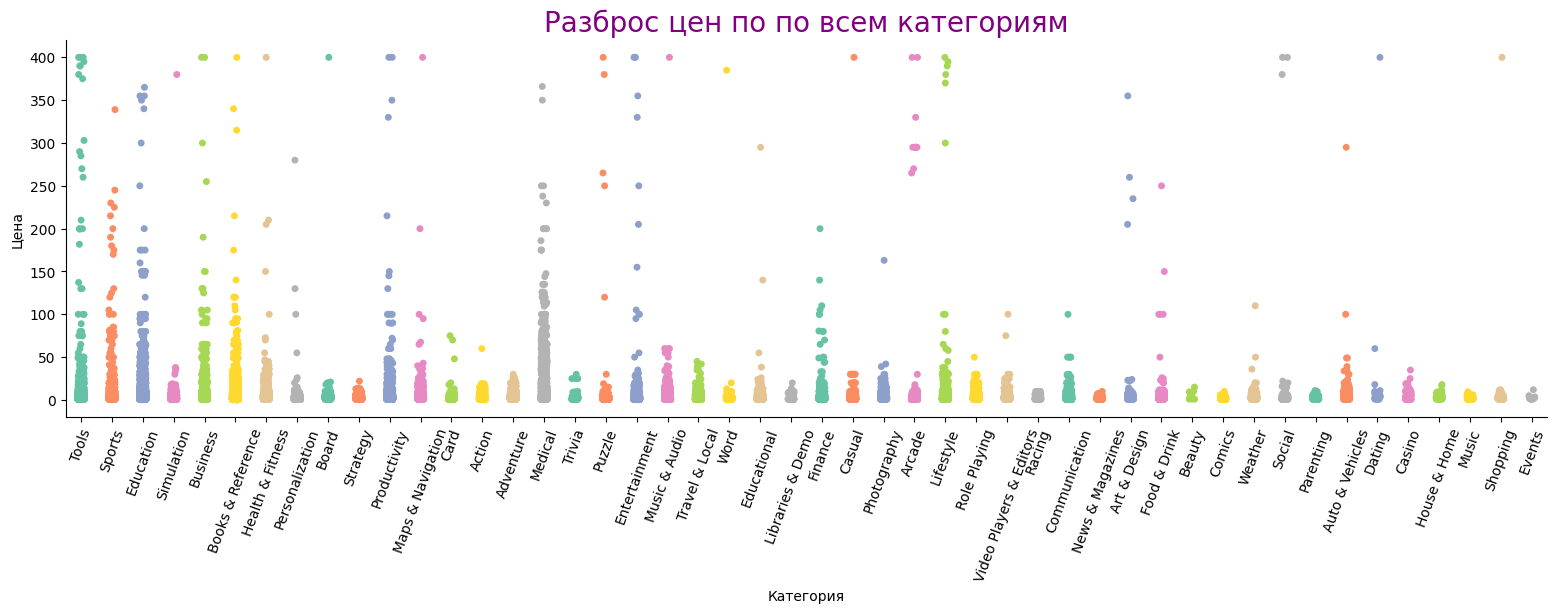

In [81]:
# Разброс цен приложений по категориям
pict=sns.catplot(
    x='Category', 
    y='Price', 
    data=pl_with_0_dol, 
    kind='strip', 
    height=4.5, 
    aspect=3.5,
    palette='Set2'
    );

pict.tick_params(axis='x', rotation=70);
plt.title('Разброс цен по по всем категориям', size=20, color='Purple');
plt.xlabel('Категория');
plt.ylabel('Цена');

In [82]:
# Вывводим количество приложений по категориям
rich_app=pl_with_0_dol.groupby(['Category'])['App_name'].count().sort_values(ascending=False).reset_index().rename(columns={'App_name': 'quantity_app'}).sort_values(by='quantity_app',ascending=False)
rich_app.head(5)
# Выводим сумму цен по категориям
rich_p=pl_with_0_dol.groupby(['Category'])['Price'].sum().sort_values(ascending=False).reset_index().rename(columns={'Price': 'Sum_price_p'}).sort_values(by='Sum_price_p',ascending=False)
rich_p.head(5)
# Объединяем две таблицы rich_app and rich_p
tot_rich=pd.merge(rich_p, rich_app, on=['Category','Category'])
tot_rich['average_price']=tot_rich['Sum_price_p']/tot_rich['quantity_app']
tot_rich1=tot_rich.sort_values(by='average_price', ascending=False).reset_index()
tot_rich1.head(5)


,index,Category,Sum_price_p,quantity_app,average_price
0,36,Dating,553.8,24,23.1
1,1,Medical,"22,810.7",1366,16.7
2,9,Business,"8,238.2",670,12.3
3,30,Art & Design,"1,641.5",172,9.5
4,4,Sports,"10,753.7",1351,8.0


C:\Users\Valentin\AppData\Local\Temp\ipykernel_9432\2500163113.py:5: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(tot_rich2, x="average_price", y="Category", hue="quantity_app",palette=a)


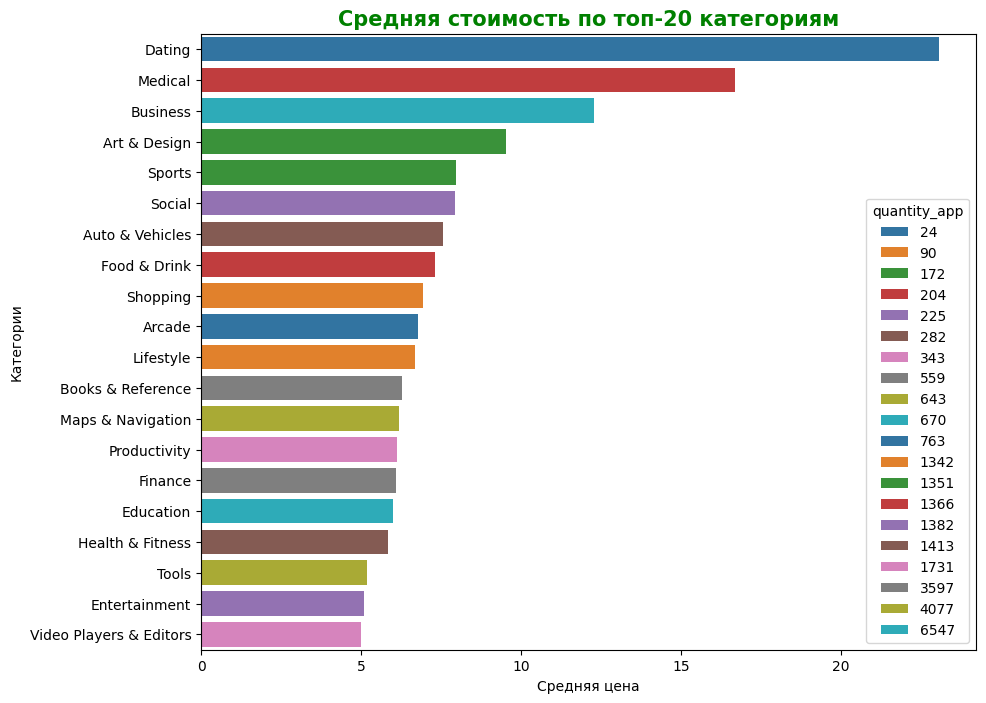

In [94]:
tot_rich2=tot_rich1.nlargest(20,'average_price').sort_values(by='average_price',ascending=False)
a=sns.color_palette()
rcParams['figure.figsize']= 10,8

sns.barplot(tot_rich2, x="average_price", y="Category", hue="quantity_app",palette=a)
plt.title('Средняя стоимость по топ-20 категориям', size=15, color='g', weight='bold');
plt.xticks(rotation=0);
plt.yticks(rotation=0);
plt.xlabel('Средняя цена');
plt.ylabel('Категории');

In [105]:
# Вывели приложения по выручке
pl_benfit=pl_with_0_dol.loc[:,['Category','App_name','Price','Maximum_installs']]
pl_benfit['benefit']=pl_benfit['Price']*pl_benfit['Maximum_installs']
pl_benfit_1=pl_benfit.reset_index().sort_values(by='benefit', ascending=False)
pl_benfit_1['benefit_thous_usd']=pl_benfit_1['benefit']/1000
pl_benfit_2=pl_benfit_1.reset_index()
pl_benfit_2


,level_0,index,Category,App_name,Price,Maximum_installs,benefit,benefit_thous_usd
0,16307,837351,Arcade,Minecraft,7.5,36183322,"271,013,081.8","271,013.1"
1,37656,1933739,Music & Audio,Poweramp Full Version Unlocker,5.0,5481771,"27,354,037.3","27,354.0"
2,13957,714228,Business,OfficeSuite Pro + PDF,20.0,1263573,"25,258,824.3","25,258.8"
3,7708,394623,Action,Grand Theft Auto: San Andreas,7.0,3549625,"24,811,878.8","24,811.9"
4,9925,508696,Action,Hitman Sniper,1.0,24958893,"24,709,304.1","24,709.3"
...,...,...,...,...,...,...,...,...
44928,41104,2113854,Social,HOLY LIGHT AZUL,4.0,0,0.0,0.0
44929,35159,1806780,Education,Investigación Cualitativa (Sin-Publicidad),2.0,0,0.0,0.0
44930,31899,1639903,Personalization,Olive - PolkaDot Wallpapers,1.0,0,0.0,0.0
44931,9096,465772,Business,eVolution Safety Event Reporting,130.0,0,0.0,0.0


C:\Users\Valentin\AppData\Local\Temp\ipykernel_9432\941900784.py:5: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(pl_benfit_3, x='benefit_thous_usd', y='App_name', hue='Price', palette=b)
C:\Users\Valentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Valentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


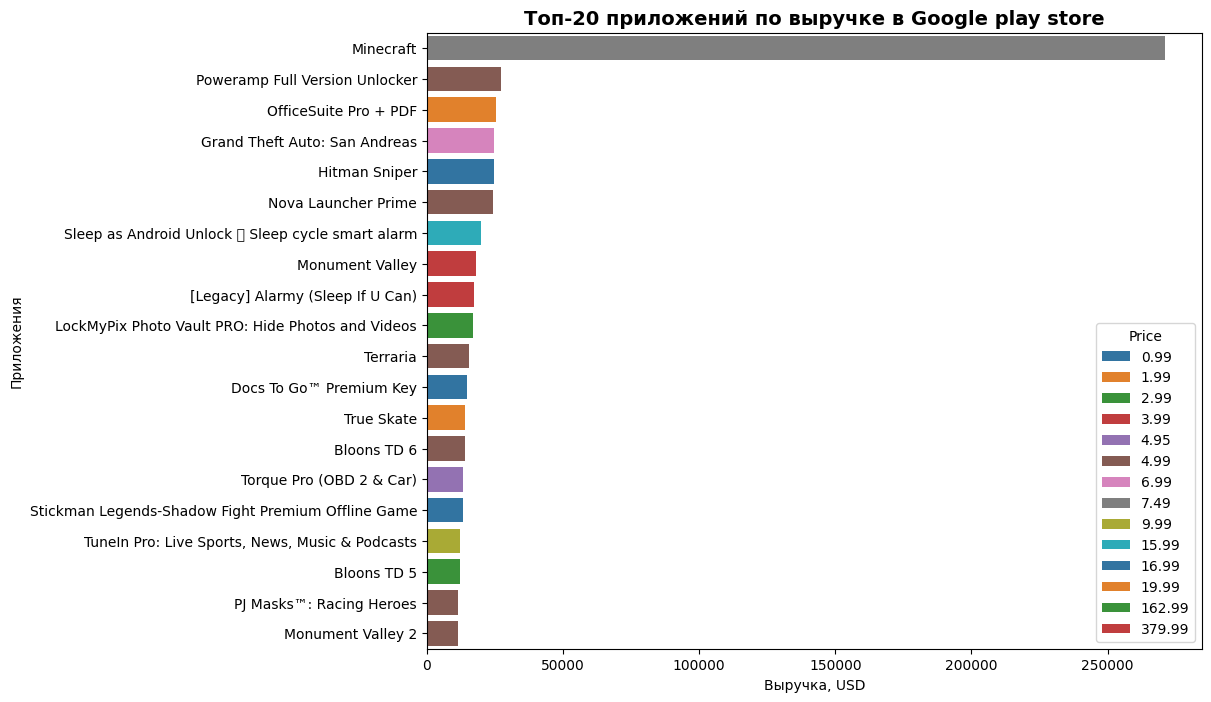

In [120]:
pl_benfit_3=pl_benfit_2.nlargest(20,'benefit_thous_usd').sort_values(by='benefit_thous_usd',ascending=False)
b=sns.color_palette()
rcParams['figure.figsize']= 10,8

sns.barplot(pl_benfit_3, x='benefit_thous_usd', y='App_name', hue='Price', palette=b)
plt.title('Топ-20 приложений по выручке в Google play store', size=14, color='black', weight='bold');
plt.xticks(rotation=0);
plt.yticks(rotation=0);
plt.xlabel('Выручка, USD');
plt.ylabel('Приложения');

In [116]:
query_5='''WITH categ as (SELECT Category, App_name, Price, Maximum_installs, (Price*Maximum_installs) AS benefit FROM play_store WHERE Price<>0 AND Currency LIKE 'USD' ORDER BY benefit DESC)
SELECT Category, count(App_name) as quantity_app, sum(benefit) AS benefit FROM categ GROUP BY Category order BY benefit DESC;

'''
result_5= c.execute(query_5).fetchall()
result_5
columns_b = [column[0] for column in c.description]
columns_b
# Выводим таблцу с кол-во приложений в каждой категории и выручку ао каждой категории
table_5=pd.DataFrame(result_5, columns=columns_b)
table_5['benefit_thous_usd']=table_5['benefit']/1000
table_5.head(10)

,Category,quantity_app,benefit,benefit_thous_usd
0,Arcade,763,"370,076,669.6","370,076.7"
1,Action,586,"217,323,862.4","217,323.9"
2,Tools,4077,"163,080,460.0","163,080.5"
3,Role Playing,666,"157,404,849.7","157,404.8"
4,Puzzle,1244,"142,674,180.8","142,674.2"
5,Adventure,982,"139,699,255.5","139,699.3"
6,Music & Audio,1524,"134,509,892.9","134,509.9"
7,Simulation,646,"114,985,345.5","114,985.3"
8,Photography,564,"108,737,082.6","108,737.1"
9,Strategy,560,"107,857,068.6","107,857.1"


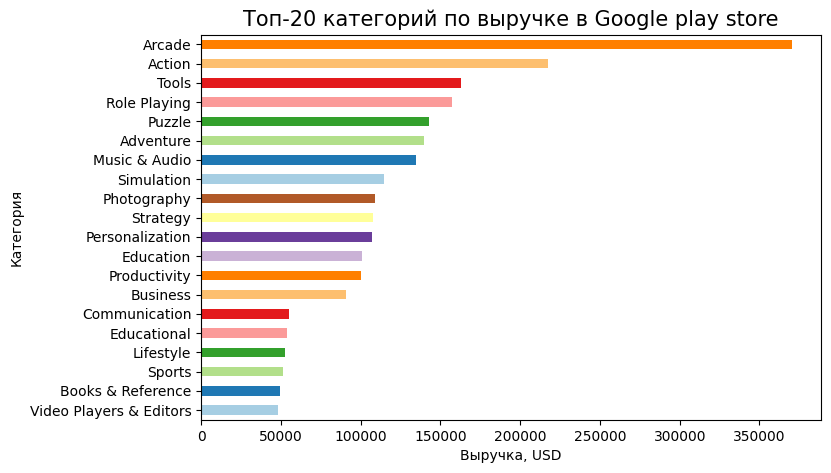

In [117]:
colors = sns.color_palette("Paired").as_hex()[:len(table_5)]
table_5.head(20).sort_index(ascending=False).plot(x='Category', y='benefit_thous_usd', kind='barh',figsize=(8, 5),color=colors, legend=False)

plt.title('Топ-20 категорий по выручке в Google play store', size=15)
plt.xlabel('Выручка, USD')
plt.ylabel('Категория')
plt.show()

## Находим самые дорогие приложения по категориям

In [80]:
max_pr=pl_with_0_dol.groupby(['App_name','Category','Maximum_installs'])['Price'].max().reset_index().nlargest(20,'Price')
max_pr=max_pr.reset_index()
max_pr.head(5)


,index,App_name,Category,Maximum_installs,Price
0,21275,MESH Connect,Productivity,25,400.00
1,1332,Accounting Provider for Green Office Flow,Tools,0,399.99
2,1358,Acid Reflux Treatment,Health & Fitness,1,399.99
3,3041,AudD,Music & Audio,4397,399.99
4,3576,Baby Nightmares,Arcade,5,399.99


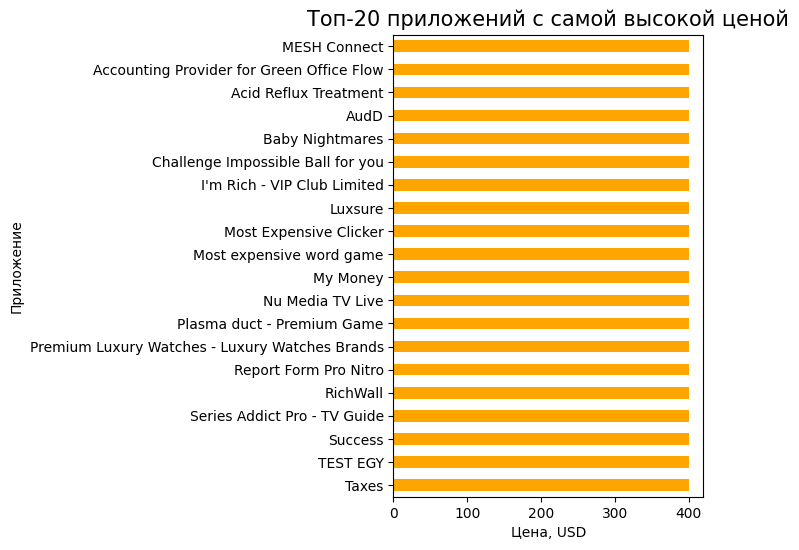

In [81]:

max_pr.sort_index(ascending=False).plot(x='App_name', y='Price', kind='barh',figsize=(4, 6), color='orange',legend=False)

plt.title('Топ-20 приложений с самой высокой ценой', size=15)
plt.xlabel('Цена, USD')
plt.ylabel('Приложение')
plt.show()


In [82]:
min_pr=pl_with_0_dol.groupby(['App_name','Category','Minimum_installs'])['Price'].min().reset_index().nsmallest(20, 'Price')
min_pr=min_pr.reset_index()
min_pr.head(5)

,index,App_name,Category,Minimum_installs,Price
0,16812,História - Boa Noitinha,Entertainment,10.0,0.194824
1,18479,Jogo da memória - Gênio,Puzzle,0.0,0.194824
2,29349,Rajasthan Geography Pro,Education,10.0,0.204735
3,42364,"Мои Открытки. Поздравления, цитаты, шутки.",Books & Reference,10.0,0.207889
4,42428,Оказание первой помощи,Books & Reference,10.0,0.207889


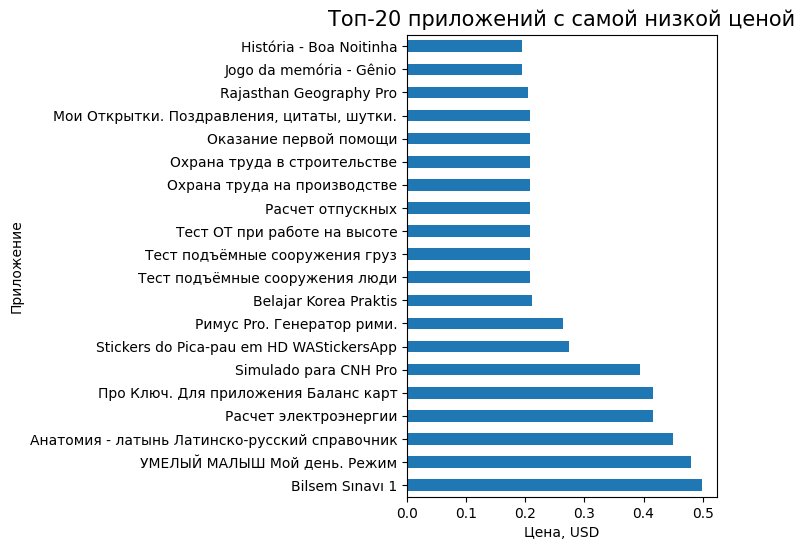

In [84]:
from pylab import rcParams
min_pr.sort_index(ascending=False).plot(x='App_name', y='Price', kind='barh',figsize=(4, 6), legend=False)


plt.title('Топ-20 приложений с самой низкой ценой', size=15)
plt.xlabel('Цена, USD')
plt.ylabel('Приложение')
plt.show()

plt.show()

## Какие категории содержат самое большое количество приложений без отзывов 

In [151]:
pl_store['Rating'].value_counts().head(5)

Rating
0.0    1059762
5.0     100122
4.2      87993
4.4      86304
4.3      83276
Name: count, dtype: int64

In [152]:
(pl_store['Rating'].value_counts()/len(pl_store)).apply(lambda x: f'{x:.1%}').head(5)

Rating
0.0    45.8%
5.0     4.3%
4.2     3.8%
4.4     3.7%
4.3     3.6%
Name: count, dtype: object

In [122]:
# Убираем цены с 0 и сортируем категории по наличию наибольшего кол-ва цен в каждой категории
pl_rating_with_0=pl_store.query("Rating!=0") # убрали нули из DataFrame

In [123]:
pl_store['Rating'].value_counts().reset_index().sort_values(by='Rating',ascending=True).head(5)

,Rating,count
0,0.0,1059762
38,1.0,713
41,1.1,236
40,1.2,531
39,1.3,579


In [124]:
# Создаем список из 20 категорий понаибольшему количеству цен в каждой категории
rat=pl_rating_with_0.groupby(['Category'])['Rating'].count().sort_values(ascending=False).reset_index().nlargest(20,'Rating')
rat
catalog=list(rat['Category'])
# Оставляем только те котигории, которые указаны в списке sol ( с помощью isi используется для фильтрации данных, проверяя, содержится ли каждый элемент в DataFrame)
tot_rat1=pl_rating_with_0[pl_rating_with_0['Category'].isin(catalog)]
tot_rat=tot_rat1.sort_values(by=['Category','Rating'])
tot_rat.head(5)

,App_name,App_id,Category,Rating,Rating_count,Installs,Minimum_installs,Maximum_installs,Free,Price,Currency,Minimum Android,Released,Last_updated,Ad_supported,In_app_purchases,Scraped Time
426307,Lucky Hub,com.fun.mua,Arcade,1.0,5.0,500+,500.0,574,Free,0.0,USD,4.4W and up,2020,2020,True,False,2021-06-16 03:28:55
530982,Hide Evidence 3D,com.hideevidence3d,Arcade,1.0,6.0,"1,000+","1,000.0",2107,Free,0.0,USD,4.4 and up,2021,2021,True,False,2021-06-16 05:03:13
696989,Aerials - System Of A Down - Piano Tunes,com.GameChangers.PianoTunesAerialsSystemOfADown,Arcade,1.0,8.0,500+,500.0,533,Free,0.0,USD,4.1 and up,2018,2018,True,False,2021-06-16 07:35:17
1020362,GunCraft: Defense the City,com.defugames.guncraft,Arcade,1.0,6.0,500+,500.0,913,Free,0.0,USD,5.0 and up,2021,2021,True,False,2021-06-16 12:38:23
1214977,Scan Them,com.homa.scanthem,Arcade,1.0,8.0,"1,000+","1,000.0",2167,Free,0.0,USD,5.0 and up,2021,2021,False,False,2021-06-15 20:54:41


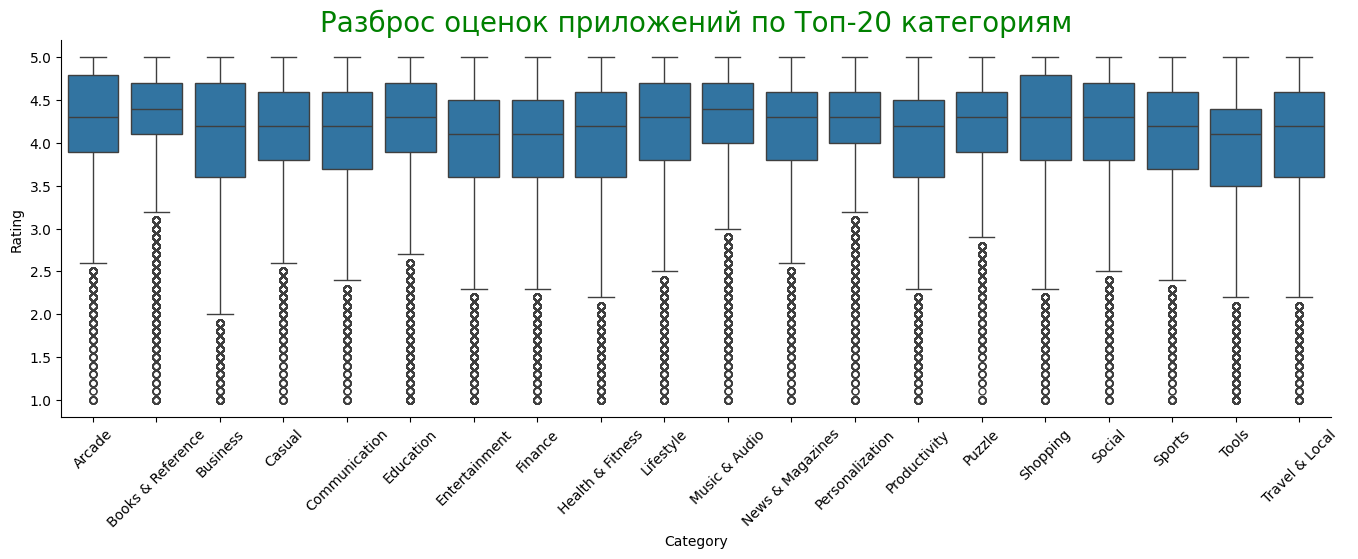

In [125]:
pict1=sns.catplot(
    x='Category', 
    y='Rating', 
    data=tot_rat, 
    kind='box', 
    height=4.5, 
    aspect=3
    );
pict1.tick_params(axis='x', rotation=45) 
plt.title('Разброс оценок приложений по Топ-20 категориям', size=20, color='g');

In [127]:
# Шаг 1: Получение списка топ-20 категорий по количеству приложений
pl_rating_with_3=pl_rating_with_0.query('Rating>=3.0')
top_categories = pl_rating_with_3['Category'].value_counts().head(15).index

# Фильтрация датафрейма по топ-категориям
filtered_df = pl_rating_with_3[pl_rating_with_3['Category'].isin(top_categories)]

# Шаг 2: Подсчет количества приложений по значению рейтинга для каждой категории
rating_count = filtered_df.groupby(['Category', 'Rating']).size().unstack(fill_value=0)
rating_count.head(4)

Rating,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Category,,,,,,,,,,,,,,,,,,,,,
Arcade,352,295,433,484,639,679,810,1047,1255,1336,...,1504,1922,1788,1771,1520,1729,1505,2029,2017,4573
Books & Reference,549,461,672,716,1006,1017,1313,1588,2005,2073,...,3317,4688,4813,5868,5926,6928,6232,5560,3211,3772
Business,975,787,1052,1045,1374,1336,1460,1747,1988,2057,...,2346,3173,2739,2886,2520,2748,2113,2415,1865,6399
Education,1475,1207,1664,1751,2398,2592,2930,3691,4516,5054,...,6874,9330,9020,9623,9103,9615,7741,7902,5988,12250


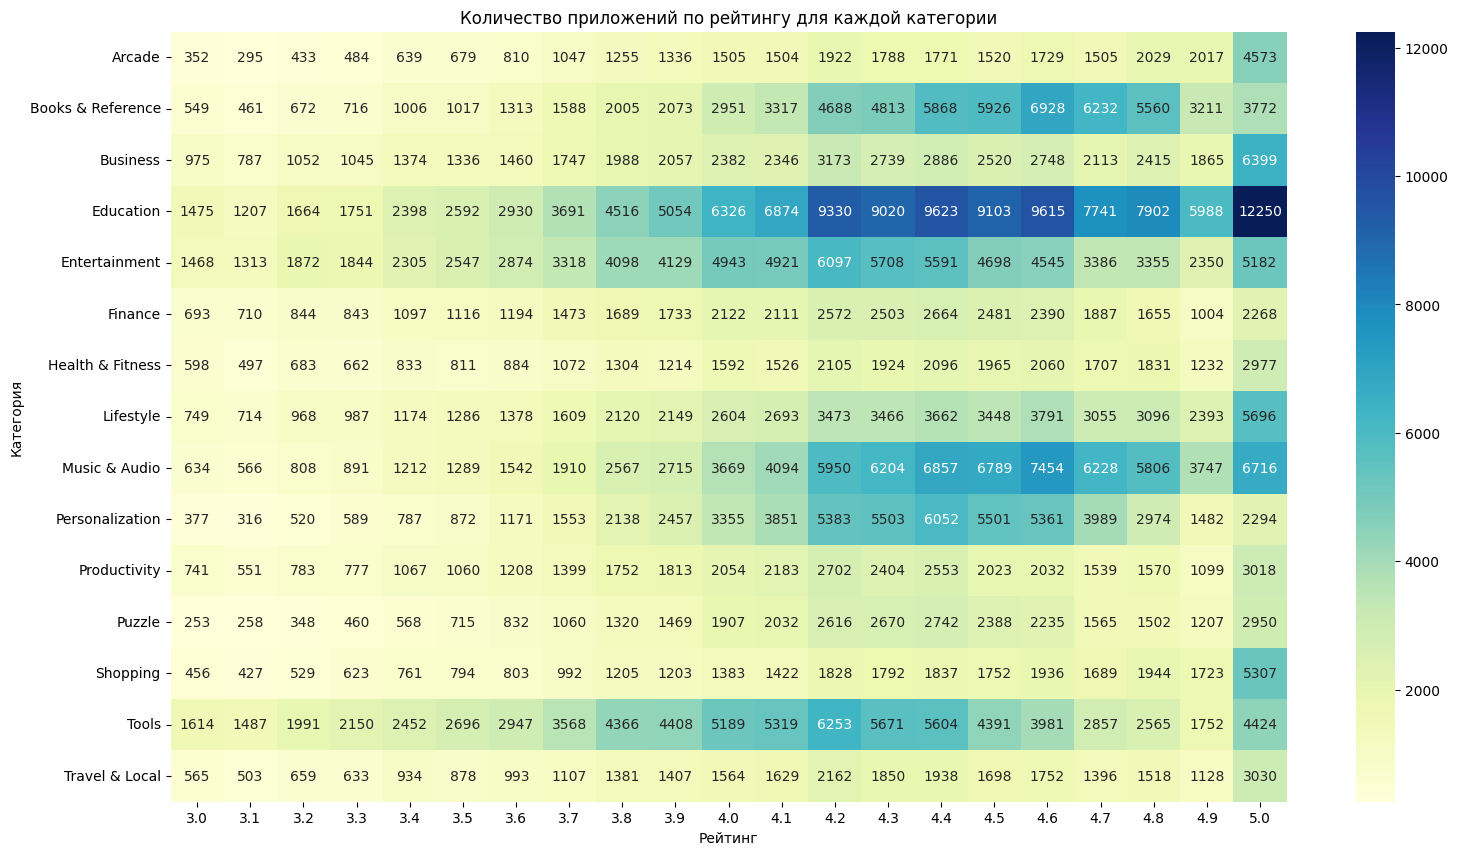

In [128]:
plt.figure(figsize=(18, 10))
sns.heatmap(rating_count, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Количество приложений по рейтингу для каждой категории')
plt.xlabel('Рейтинг')
plt.ylabel('Категория')
plt.show()

In [129]:
query_6='''SELECT Category, count(Rating) AS rating_quant FROM play_store WHERE Rating=0 GROUP BY Category ORDER BY rating_quant DESC;

'''
result_6=c.execute(query_6).fetchall()
result_6
columns_rat= [column[0] for column in c.description]
columns_rat

['Category', 'rating_quant']

In [130]:
table_6=pd.DataFrame(result_6, columns=columns_rat)
table_6.head(4)

,Category,rating_quant
0,Education,111528
1,Business,91652
2,Music & Audio,74406
3,Lifestyle,62539


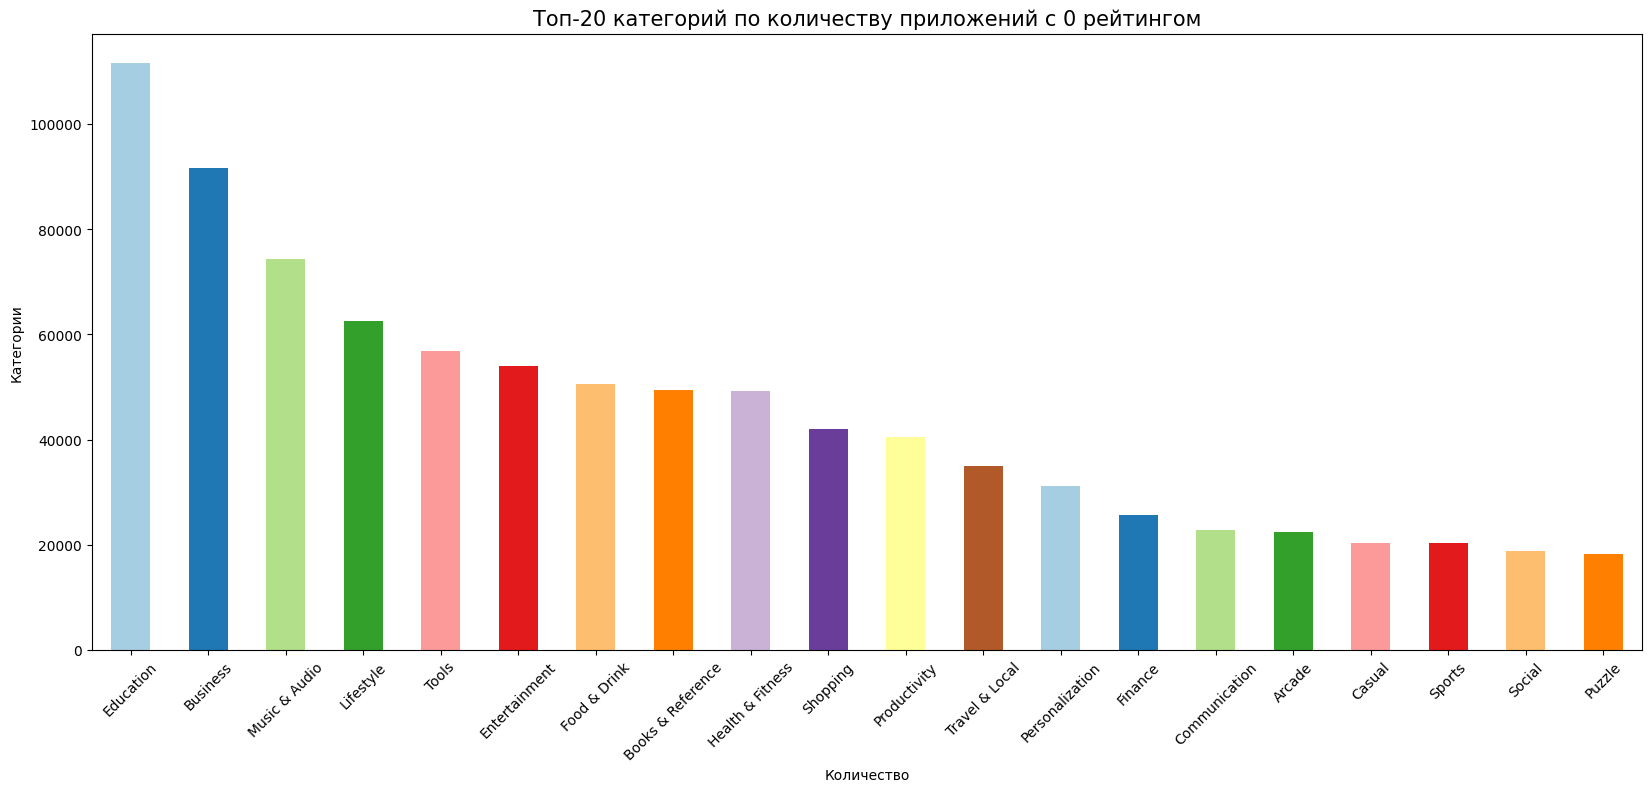

In [139]:
colors = sns.color_palette("Paired").as_hex()[:len(table_6)]

table_6.head(20).sort_values(by='rating_quant',ascending=False).plot(x='Category', y='rating_quant', kind='bar', color=colors, figsize=(20, 8), legend=False)
                                                                    
plt.title('Топ-20 категорий по количеству приложений с 0 рейтингом', size=15)
plt.xlabel('Количество')
plt.ylabel('Категории')
plt.xticks(rotation=45);
plt.yticks(rotation=0);
plt.show()

plt.show()

## Корреляция

In [94]:
pl_cor=pl_store[['Rating','Rating_count','Maximum_installs','Price','Minimum_installs']]
pl_cor.head(5)

,Rating,Rating_count,Maximum_installs,Price,Minimum_installs
0,0.0,0.0,15,0.0,10.0
1,4.4,64.0,7662,0.0,5000.0
2,0.0,0.0,58,0.0,50.0
3,5.0,5.0,19,0.0,10.0
4,0.0,0.0,478,0.0,100.0


In [95]:
corr = pl_cor.corr()
corr

,Rating,Rating_count,Maximum_installs,Price,Minimum_installs
Rating,1.000000,0.013038,0.012615,-0.003674,0.011214
Rating_count,0.013038,1.000000,0.547571,-0.000411,0.545281
Maximum_installs,0.012615,0.547571,1.000000,-0.000515,0.954037
Price,-0.003674,-0.000411,-0.000515,1.000000,-0.000461
Minimum_installs,0.011214,0.545281,0.954037,-0.000461,1.000000


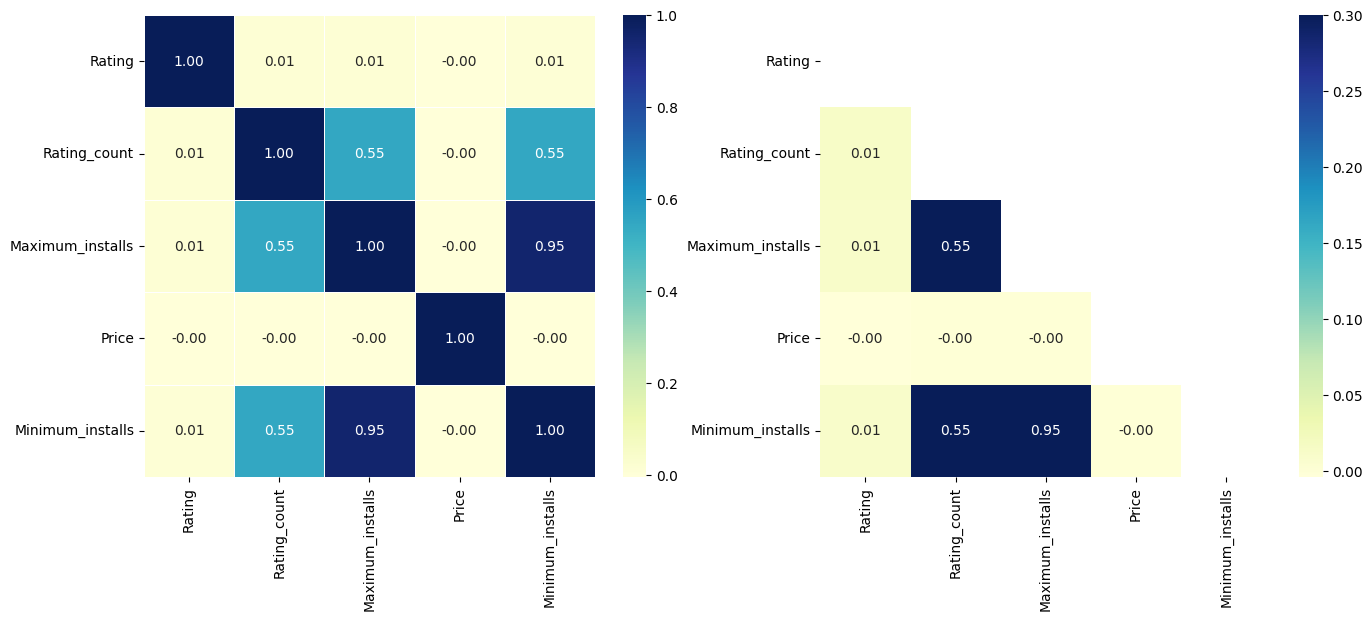

In [96]:
# Визуализируем корреляционную матрицу.
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,6)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, annot=True, fmt='.2f', cmap="YlGnBu", ax=ax2)
sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="YlGnBu", ax=ax1);

plt.show()